In [1]:
from textblob import TextBlob

In [2]:
review = 'Camera quality is not very good'
review1 = 'camera have excellent features'

In [5]:
analysis = TextBlob(review1) 

In [6]:
analysis.polarity

1.0

In [7]:
import re 
import tweepy 
from tweepy import OAuthHandler  # twitter app authentication
from textblob import TextBlob 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
# Get the below strings/api codes from developer.twitter.com
# Step 1: Login to twitter and visit the developer site
# Step 2 : Navigate to "Create a new App"
# Step 3 : fill the details accordingly
# Step 4 : api keys are now generated
# keys and tokens from the Twitter Dev Console 
consumer_key = 'VJFZEdGk7cyzbbKVPaPaAIPgs'
consumer_secret = 'WcA3PZ0ZYNuad524X3qUx97ExiEmI0gULZ3JcMMwmxn920xxC7'
access_token = '3257684406-kh5gJuLncLMe9o1kQVKS60FH47XmITXMUgo4qmB'
access_token_secret = 'BPg3GA7pSj86qvFqzmCXPCBGQeaSuPXRKdkP2UC1W85A1'

In [12]:
# attempt authentication 

# create OAuthHandler object 
auth = OAuthHandler(consumer_key, consumer_secret) 
    
# set access token and secret 
auth.set_access_token(access_token, access_token_secret) 
    
# create tweepy API object to fetch tweets 
api = tweepy.API(auth,wait_on_rate_limit=True) 

In [13]:
# 1. removing @username
# 2. tabs 
# 3. non words and other spaces
def clean_tweet(tweet): 
    ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split()) 


In [14]:
# Using text blob from above, we calculate the polarity score
# textblob has a corpus of positive, negative and neutral words
# It checks for the presence of these words in the document and calculates the overall
# polarity

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [35]:
# empty list to store parsed tweets 
tweets = [] 

# call twitter api to fetch tweets 
# count = 20
# The number of tweets to return per page, up to a maximum of 100. 
# Defaults to 15.
# This restriction is due to a security update from the Twitter API
# We will get rid of this limitation using the new 
# tweepy.Cursor() method

#fetched_tweets = api.search(q = "chidambaram", count = 100)
fetched_tweets=tweepy.Cursor(api.search,q="Kashmir").items(10)

# parsing tweets one by one 
for tweet in fetched_tweets: 
    # empty dictionary to store required params of a tweet 
    parsed_tweet = {} 

    # saving text of tweet 
    parsed_tweet['text'] = tweet.text

    
    # saving sentiment of tweet 
    parsed_tweet['sentiment'] = get_tweet_sentiment(tweet=clean_tweet(tweet.text)) 

    # appending parsed tweet to tweets list 
    if tweet.retweet_count > 0: 
        # if tweet has retweets, ensure that it is appended only once 
        if parsed_tweet not in tweets: 
            tweets.append(parsed_tweet) 
    else: 
        tweets.append(parsed_tweet) 

In [36]:
len(tweets)

10

In [37]:
tweets[0:5]

[{'text': 'RT @sjeeva26: காஷ்மீர் விவகாரத்தில் முரண்பாடான நிலையா?- விவரிக்கும் திருச்சி சிவா எம்.பி @tiruchisiva \n\nநாளை பிற்பகல் 2 மணிக்கு....கலைஞர்…',
  'sentiment': 'neutral'},
 {'text': 'RT @NihaMasih: WATCH: Nisar Ahmad Mir said Indian policemen detained his minor son on Aug. 24 in Kashmir. Two days later, his son, Danish,…',
  'sentiment': 'negative'},
 {'text': 'RT @NR_Ikram1: #Balochistan stands with #Kashmir \n\nVoice of #Balochistan- #Dalbandin \nPeople from across the province attended the rallies…',
  'sentiment': 'neutral'},
 {'text': 'RT @OpIndia_com: Many videos have emerged where angry Pakistanis can be seen censuring Pakistan PM Imran Khan for his edict for ordinary Pa…',
  'sentiment': 'negative'},
 {'text': 'RT @PTIofficial: If today, the world won’t stand for Kashmir infront of facist and racist Government of Modi, it’ll ultimately affect rest…',
  'sentiment': 'neutral'}]

In [28]:
# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 

Positive tweets percentage: 22.727272727272727 %


In [29]:
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 

Negative tweets percentage: 4.545454545454546 %


In [30]:
# percentage of neutral tweets 
print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 

Neutral tweets percentage: 72.72727272727273 %


In [31]:
df_tweets_cnt = pd.DataFrame(pd.concat([pd.Series(len(ptweets)), pd.Series(len(ntweets)), pd.Series( (len(tweets) - len(ntweets) - len(ptweets))) ],axis=0 ))
df_tweets_cnt.set_index(pd.Series(['ptweets', 'ntweets', 'nuetral_tweets']), inplace=True)
print(df_tweets_cnt)

                 0
ptweets         10
ntweets          2
nuetral_tweets  32


In [32]:
# printing first 10 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(clean_tweet(tweet['text'])) 



Positive tweets:
RT EconomyCrisis Confession of P Chidambaram that UPA1 inherited a healthy and robust economy from Vajpayee govt CONGRESS
RT Economy is in trouble youth want jobs Devote more time to economics not petty politics Chidambaram ji please focus on
EconomyCrisis Confession of P Chidambaram that UPA1 inherited a healthy and robust economy from Vajpayee govt CO
RT To escape ED custody Chidambaram offers to remain in CBI custody till Sept 2Former Finance Minister dreading ED cus
RT Former FM and HM Chidambaram is being hounded by ED and CBI on instruction of NDA Government higher ups by spreading mis
RT There are some bhakts who are still busy celebrating how Modi snubbed Pakistan on article 370 and how chidambaram is shown hi
Tharigami yechuri or chidambaram would be a better choice than Rahul i
bear Ok Saste EconomistOr ha modi ne sahi to bola haiShriman Chidambaram jiHum toh Aap ke jit
We are just pawns Karti is the real boss Directors of shell company drop a bombshell on 

In [33]:
# printing first 10 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    print(tweet['text']) 



Negative tweets:
RT On 230819 Burrabazar District Congress Sevadal participated in governor house agitation programme against the arrest of ex
Congress desperate to come in power by any means they are caught in taking bribe like P ChidambaramTh


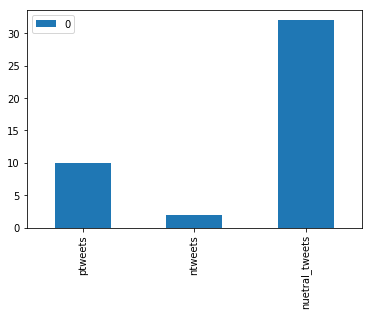

In [34]:
df_tweets_cnt.plot(kind='bar')